In [8]:
# some_file.py
# %load_ext autoreload
# %autoreload 2
from astropy.io import fits 
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(0, '/Users/hannahfronenberg/Documents/GitHub/pygdsm/pygdsm')
from pygsm2016 import GlobalSkyModel2016
from pygsm import GlobalSkyModel


/Users/hannahfronenberg/miniconda3/envs/py3/lib/python3.9/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  newcm.set_over(newcm(1.0))
/Users/hannahfronenberg/miniconda3/envs/py3/lib/python3.9/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  newcm.set_under(bgcolor)
/Users/hannahfronenberg/miniconda3/envs/py3/lib/python3.9/site-packages/healpy/projaxes.py:922: MatplotlibDeprecationWarning: You 

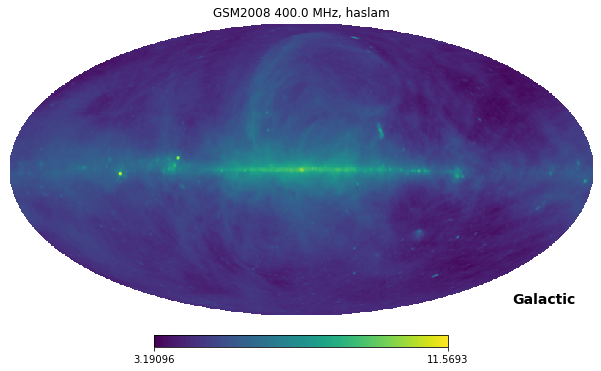

In [9]:
gsm = GlobalSkyModel(basemap = 'haslam')
gsm.generate(400)
gsm.view(logged=True)

/Users/hannahfronenberg/Documents/GitHub/pygdsm/pygdsm/base_skymodel.py:65: RuntimeWarning: invalid value encountered in log2
  gmap = np.log2(gmap)


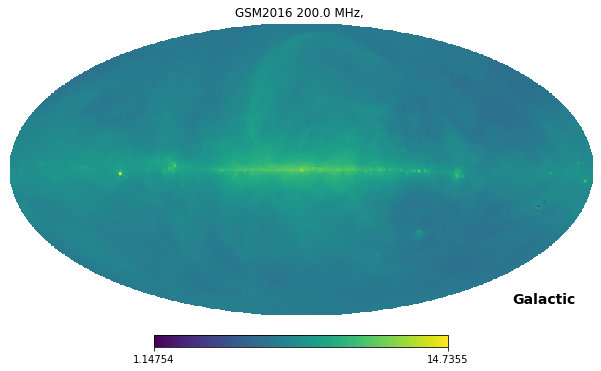

In [10]:
gsm_2016 = GlobalSkyModel2016(data_unit = 'TRJ')
gsm_2016.generate(200) # Generate at 150 MHz
plot = gsm_2016.view(logged=True)

In [11]:
nside = 1024 # the Global sky model is in healpix format with Nside = 1024
hp.pixelfunc.ang2pix(1024,[1],[4])


array([2892335])

In [15]:

# ax[0][0].
# ax[0][1].
# ax[0][2].
# ax[1][0].
# ax[1][1].
# ax[1][2].
# ax[2][0].
# ax[2][1].
# ax[2][2].
# divider = make_axes_locatable(ax[0][1])
# cax2 = divider.append_axes("right", size="7%", pad=0.1)
# cbar = fig.colorbar(img1, cax=cax2)
# cbar.set_label('I [kJy/sr]', fontsize = 15)


# fig = plt.figure()

# ax1 = fig.add_subplot(211)
# ax2 = fig.add_subplot(212)

# ax1.plot([1,2])

# ax1.tick_params(
#     axis='x',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     bottom='off',      # ticks along the bottom edge are off
#     top='off',         # ticks along the top edge are off
#     labelbottom='off'  # labels along the bottom edge are off)
# )




/var/folders/rx/h899l7s51ds34rqj_3lmczzh0000gn/T/ipykernel_19839/4260245996.py:18: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(ax2)


ValueError: Single argument to subplot must be a three-digit integer, not AxesSubplot(0.547727,0.536818;0.352273x0.343182)

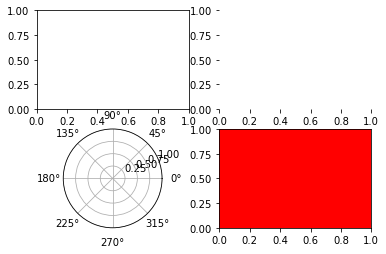

In [16]:
plt.subplot(221)

# equivalent but more general
ax1 = plt.subplot(2, 2, 1)

# add a subplot with no frame
ax2 = plt.subplot(222, frameon=False)

# add a polar subplot
plt.subplot(223, projection='polar')

# add a red subplot that shares the x-axis with ax1
plt.subplot(224, sharex=ax1, facecolor='red')



# add ax2 to the figure again
plt.subplot(ax2)

# make the first axes "current" again
plt.subplot(221)

# Generating data file for each freq

In [51]:
chunck_1 = np.arange(1420/(6.5+1),1420/(6+1),0.097) #central z = 6.25
chunck_2 = np.arange(1420/(7+1),1420/(6.5+1),0.097) #central z = 6.75
chunck_3 = np.arange(1420/(7.5+1),1420/(7+1),0.097) #central z = 7.25
chunck_4 = np.arange(1420/(8+1),1420/(7.5+1),0.097) #central z = 7.75

# all_chuncks = np.concatenate((chunck_1,chunck_2,chunck_3,chunck_4))

freqs = chunck_4 #put all the freqs for which you want to make a sky map here! 


for i in range(len(freqs)): 
    gsm_2016 = GlobalSkyModel2016(data_unit = 'TRJ')
    formatted_string = "{:.3f}".format(freqs[i])
    freq = float(formatted_string)
    gsm_2016.generate(freq) # Generate at i MHz
    data = gsm_2016.generated_map_data
    data = data.astype(np.float32)
    data.tofile('pygdsm_%sMHz.bin'%freqs[i])

# Reading out the data

In [27]:
data_bin = np.fromfile('pygdsm_126MHz.bin', dtype=np.float32) # use complex32 s dtype

print(data_bin)


[251.21526 237.78012 232.94164 ... 282.07898 289.37143 282.5055 ]


# Random

In [5]:
gsm_2016.generated_map_freqs

NameError: name 'gsm_2016' is not defined

In [6]:
print(data)

NameError: name 'data' is not defined